In [45]:
import rebound
import matplotlib.pyplot as plt
import numpy as np
import datetime
%matplotlib inline
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Jupiter")
sim.add("Saturn")
sim.add("Churyumov-Gerasimenko", m=5.03e-18)

Searching NASA Horizons for 'Sun'... Found: Sun (10).
Searching NASA Horizons for 'Jupiter'... Found: Jupiter Barycenter (5).
Searching NASA Horizons for 'Saturn'... Found: Saturn Barycenter (6).
Searching NASA Horizons for 'Churyumov-Gerasimenko'... Found: 67P/Churyumov-Gerasimenko.


<rebound.Orbit instance, a=5.202119654083844 e=0.048903609096004205 inc=0.022754397193726433 Omega=1.7542906457632088 omega=-1.505254882539723 f=2.8787250202517582>
<rebound.Orbit instance, a=9.547285250023949 e=0.053908165958649785 inc=0.043407159906896926 Omega=1.9827862940713066 omega=-0.3632396940946505 f=2.8256620531257752>
<rebound.Orbit instance, a=3.443702941452939 e=0.6415922589573728 inc=0.12311342947918202 Omega=0.8737457595647731 omega=0.21886411627314126 f=2.2857268933378663>
Minimum distance (0.037535 AU) occured at time: -57.457457 years.


'1959-02-16 07:26'

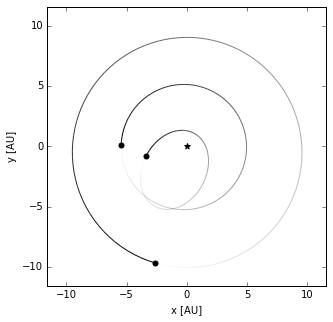

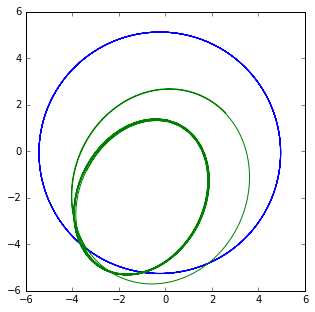

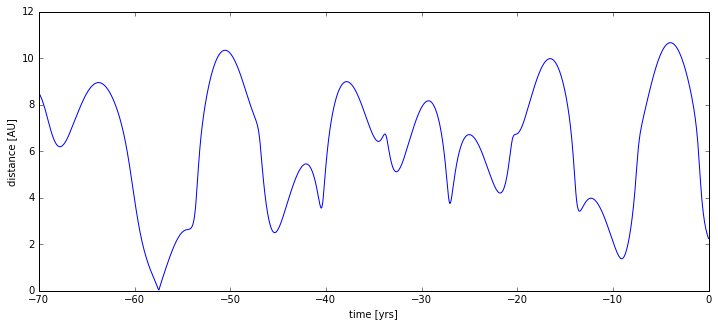

In [46]:
for orbit in sim.calculate_orbits():
    print(orbit)
fig = rebound.OrbitPlot(sim, trails=True, unitlabel="[AU]")

sim.dt = -0.01
Noutputs = 1000
year = 2.*np.pi # One year in units where G=1
times = np.linspace(0.,-70.*year, Noutputs)
x = np.zeros((2,Noutputs))
y = np.zeros((2,Noutputs))

sim.integrator = "ias15" # IAS15 is the default integrator, so we actually don't need this line
sim.move_to_com()        # We always move to the center of momentum frame before an integration
ps = sim.particles       # ps is now an array of pointers and will change as the simulation runs

for i,time in enumerate(times):
    sim.integrate(time)
    x[0][i] = ps[1].x   # This stores the data which allows us to plot it later
    y[0][i] = ps[1].y
    x[1][i] = ps[3].x
    y[1][i] = ps[3].y

fig = plt.figure(figsize=(5,5))
ax = plt.subplot(111)
ax.set_xlim([-6,6])
ax.set_ylim([-6,6])
plt.plot(x[0], y[0]);
plt.plot(x[1], y[1]);

fig = plt.figure(figsize=(12,5))
ax = plt.subplot(111)
ax.set_xlabel("time [yrs]")
ax.set_ylabel("distance [AU]")
distance = np.sqrt(np.square(x[0]-x[1])+np.square(y[0]-y[1]))
plt.plot(times/year, distance);
closeencountertime = times[np.argmin(distance)]/year
print("Minimum distance (%f AU) occured at time: %f years." % (np.min(distance),closeencountertime))

encounterdate = datetime.datetime.today() + datetime.timedelta(days=365.25*closeencountertime)
encounterdate.strftime("%Y-%m-%d %H:%M")